# Deep Learning: Apresentação do Caso MNIST.

In [1]:
# Importação das bibliotecas:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from keras.datasets import mnist

# pip install tensorflow (executar no Anaconda Prompt)

Text(0.5, 1.0, '0')

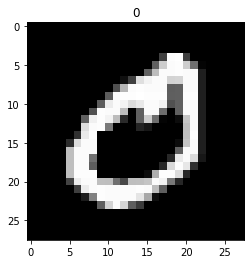

In [3]:
# Obtenção dos dados e divisão automatica entre treinamento e teste:

(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

# Visualização de imagens especifícas:

plt.imshow(X_treinamento[21], cmap = 'gray')
plt.title(y_treinamento[21])

In [4]:
# Mudança de dimensão, originalmente este em 28x28 e precisamos 784:

X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))
X_teste [0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [5]:
# Transformação dos dados para float para podermos normalizar os dados:

X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [6]:
# Normalização: (255 é o valor máximo de um pixel)

X_treinamento /= 255
X_teste /- 255

array([[-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.]], dtype=float32)

In [7]:
# Transformação para o formato dummy (temos 10 classes):

y_treinamento = np_utils.to_categorical(y_treinamento, 10)
y_teste = np_utils.to_categorical(y_teste, 10)
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [8]:
# Estrutura da rede neural: 784 - 64 - 64 - 64 - 10

# Dropout é utilizado para zerar uma porcentagemdos neuronios, para evitar o overfitting:

modelo = Sequential()
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))

# Camada de saída, softmax probabillidade:

modelo.add(Dense(units = 10, activation = 'softmax'))

In [9]:
# Visualização da estrutura da rede neural:

modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                6

In [10]:
# Configuração dos parâmetros da rede neural e treinamento (utilizando base de dados de validação)

# Na variável histórico temos os históricos das execuções (erro e accuracy)

modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
historico = modelo.fit(X_treinamento, y_treinamento, epochs = 20, validation_data = (X_teste, y_teste))

Epoch 1/20
1875/1875 [==============================] - 23s 11ms/step - loss: 0.4486 - accuracy: 0.8642 - val_loss: 22.6138 - val_accuracy: 0.9507
Epoch 2/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2306 - accuracy: 0.9335 - val_loss: 20.6027 - val_accuracy: 0.9604
Epoch 3/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1903 - accuracy: 0.9443 - val_loss: 18.3598 - val_accuracy: 0.9637
Epoch 4/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1663 - accuracy: 0.9513 - val_loss: 15.2181 - val_accuracy: 0.9677
Epoch 5/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1503 - accuracy: 0.9560 - val_loss: 17.2469 - val_accuracy: 0.9672
Epoch 6/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1386 - accuracy: 0.9579 - val_loss: 13.6786 - val_accuracy: 0.9697
Epoch 7/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1280 - accuracy: 0.9630 - val_loss: 15.2867 

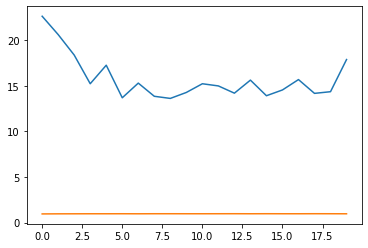

In [14]:
# Gráfico para visualizar os erros e accuracy:

historico.history.keys()

# Evolução do erro, azul:

plt.plot(historico.history['val_loss'])

# preformance da rede:

plt.plot(historico.history['val_accuracy'])

In [15]:
# Obtenção das previsões:

previsoes = modelo.predict(X_teste)
previsoes

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
# Valor máximo (com a probabilidade maior por serem 10 saídas) e geração da matriz de confusão:

y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[ 971,    1,    2,    1,    0,    0,    2,    1,    2,    0],
       [   0, 1117,    6,    6,    0,    1,    1,    1,    3,    0],
       [   4,    0, 1018,    2,    2,    0,    1,    4,    1,    0],
       [   0,    0,    7,  996,    0,    2,    0,    3,    2,    0],
       [   0,    0,    9,    0,  961,    0,    3,    4,    1,    4],
       [   3,    0,    1,   53,    1,  823,    5,    1,    3,    2],
       [   5,    3,    5,    2,    2,    5,  935,    0,    1,    0],
       [   1,    1,   14,   12,    0,    0,    0,  995,    0,    5],
       [   1,    2,   21,   31,    6,   11,    3,    5,  890,    4],
       [   5,    6,    0,   23,   16,    3,    0,    8,    0,  948]],
      dtype=int64)

In [20]:
# Previsão com um novo registro, convertendo o arrya para o formato de matriz:

# número 4:

y_treinamento[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [21]:
# Passo a mesma posição para o modelo prever:

novo = X_treinamento[20]

# de matriz para vetor:

novo = np.expand_dims(novo, axis = 0)

# previsão:

pred = modelo.predict(novo)

# maior valor:

pred = [np.argmax(pred) for t in pred]
pred

[4]